# Hierarchical clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

variables = ['X','Y','Z']
labels = ['ID_'+str(i) for i in range(5)]

In [2]:
X = np.random.random_sample([len(labels),len(variables)])
df = pd.DataFrame(X, columns=variables, index=labels)

In [3]:
df

,X,Y,Z
ID_0,0.439701,0.166400,0.327540
ID_1,0.783980,0.019892,0.038158
ID_2,0.114802,0.302816,0.966033
ID_3,0.261969,0.735481,0.218772
ID_4,0.415818,0.019221,0.139133


### 1. build distance matrix by calculating pairwise distance

In [4]:
### 1. distance matrix 
from scipy.spatial.distance import pdist

In [5]:
# pairwise distance
row_dist = pdist(df, metric='euclidean')
row_dist

array([ 0.47300559,  0.72927544,  0.60603021,  0.24026897,  1.17847264,
        0.90398288,  0.38175903,  0.87593188,  0.92455404,  0.73691266])

### 2. build hierarchy

In [6]:
from scipy.cluster.hierarchy import linkage

#### 2.1 build from the pairwise distance array, row_dist

In [7]:
hc = linkage(row_dist, 
             method='complete')

#### 2.2 build from the original data

In [8]:
hc = linkage(df.values,
             method='complete',
             metric='euclidean')

In [9]:
hc

array([[ 0.        ,  4.        ,  0.24026897,  2.        ],
       [ 1.        ,  5.        ,  0.47300559,  3.        ],
       [ 2.        ,  3.        ,  0.87593188,  2.        ],
       [ 6.        ,  7.        ,  1.17847264,  5.        ]])

### 3. Dendrogram

In [10]:
from scipy.cluster.hierarchy import dendrogram

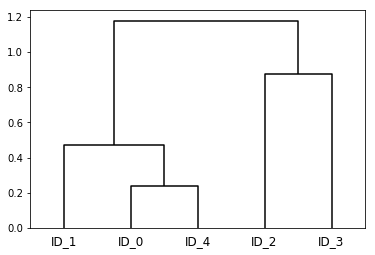

In [11]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

row_dendr = dendrogram(hc,
                       labels=labels,
                       color_threshold = np.inf
                      )

### 4. Decide the number of clusters by various criteria

In [12]:
from scipy.cluster.hierarchy import fcluster
fcluster(hc,criterion='maxclust',t=4)

array([1, 1, 2, 3, 1], dtype=int32)

In [13]:
from scipy.cluster.hierarchy import fcluster
fcluster(hc,criterion='distance',t=0.5)

array([1, 1, 2, 3, 1], dtype=int32)

### Another way: Agglomerative Clustering
Determine the number of clusters in advance but use the hierarchical clustering algorithm

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity = 'euclidean',
                             linkage='complete'
                            )

In [15]:
labels = ac.fit_predict(X)
labels

array([1, 1, 0, 0, 1], dtype=int64)